<h1>Comparing the Mean Neuroticism Scores of Drugs</h1>

<h2>Introduction</h2>

Drug consumption is rampant worldwide. Cannabis is one of the most prevalent psychoactive drugs used by around 158.8 million people around the world (United Nations, 2018). Comparatively, nicotine is a highly addictive chemical found in tobacco that is consumed by approximately 1.3 billion people worldwide (WHO, 2021). Previous research demonstrated that tobacco and cannabis are both conducive to detrimental health consequences affecting the brain (Wawryk-Gawda et al., 2019). Indeed, regular consumers of both nicotine and cannabis are more prone to experiencing personality changes such as neuroticism - a tendency to acquire negative emotions and a pervasive perception that the world is unsafe (Sauer-Zavala & Barlow, 2021). Thus, we aim to compare how using different drugs such as cannabis and nicotine can induce different neuroticism levels in individuals, using the mean neuroticism score as the location parameter and the standard deviation as the scale parameter.


Our project will use data from the Drug Consumption Dataset from the UCI Machine Learning Repository. The dataset contains records for 1885 respondents. For each respondent, 12 input attributes were recorded: personality measurements such as neuroticism, impulsivity, sensation seeking, level of education, age, gender, country of residence and ethnicity. Moreover, information on drug consumption and the frequency of drug use were also recorded.

We expect to see the relationship between frequency of drug use and the mean neuroticism score for Cannabis and Nicotine and also see which drug has a higher neurotocism score.

<h2>Methods and Results</h2>

<h3>Loading packages</h3>

In [1]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(broom)
library(repr)
library(tidyverse)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



<h3>Reading and Tyding Data from the Web</h3>

The dataset was read using the “read.table” function from the tidyverse package and then mutated to give proper names to the attributes. The data is displayed in a “tidy” format in Table 1 below.

In [2]:
drug <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", sep = ",")
drug_selected <- drug %>%
    mutate(NScore = as.numeric(V7)) %>%
    mutate(Cannabis = V19) %>%
    mutate(Nicotine = V30) %>%
    select(NScore, Cannabis, Nicotine)
"Table 1: Data for the NScores, Cannabis and Nicotine"
head(drug_selected)

[1] "Table 1: Data for the NScores, Cannabis and Nicotine"

,NScore,Cannabis,Nicotine
,<dbl>,<chr>,<chr>
1,0.31287,CL0,CL2
2,-0.67825,CL4,CL4
3,-0.46725,CL3,CL0
4,-0.14882,CL2,CL2
5,0.73545,CL3,CL2
6,-0.67825,CL0,CL6


The cannabis and nicotine data represent different categories listed below.<br>
**CL0**: Never used<br>
**CL1**: Used over a decade ago<br>
**CL2**: Used in the last decade<br>
**CL3**: Used in the last year<br>
**CL4**: Used in the last month<br>
**CL5**: Used in the last week<br>
**CL6**: Used in the last day<br>

The tidy data was then used to create two different tables for the nicotine data and the cannabis data respectively.

In [3]:
NCan <- drug_selected %>%
    select(-Nicotine)
head(NCan)
"Table 2.1: Cannabis Data"
NNic <- drug_selected %>%
    select(-Cannabis)
head(NNic)
"Table 2.2: Nicotine Data"

,NScore,Cannabis
,<dbl>,<chr>
1,0.31287,CL0
2,-0.67825,CL4
3,-0.46725,CL3
4,-0.14882,CL2
5,0.73545,CL3
6,-0.67825,CL0


[1] "Table 2.1: Cannabis Data"

,NScore,Nicotine
,<dbl>,<chr>
1,0.31287,CL2
2,-0.67825,CL4
3,-0.46725,CL0
4,-0.14882,CL2
5,0.73545,CL2
6,-0.67825,CL6


[1] "Table 2.2: Nicotine Data"

Using the separated nicotine and cannabis data tables, the neuroticism scores (Nscores) of the sample population were plotted using the geom_boxplot() function.

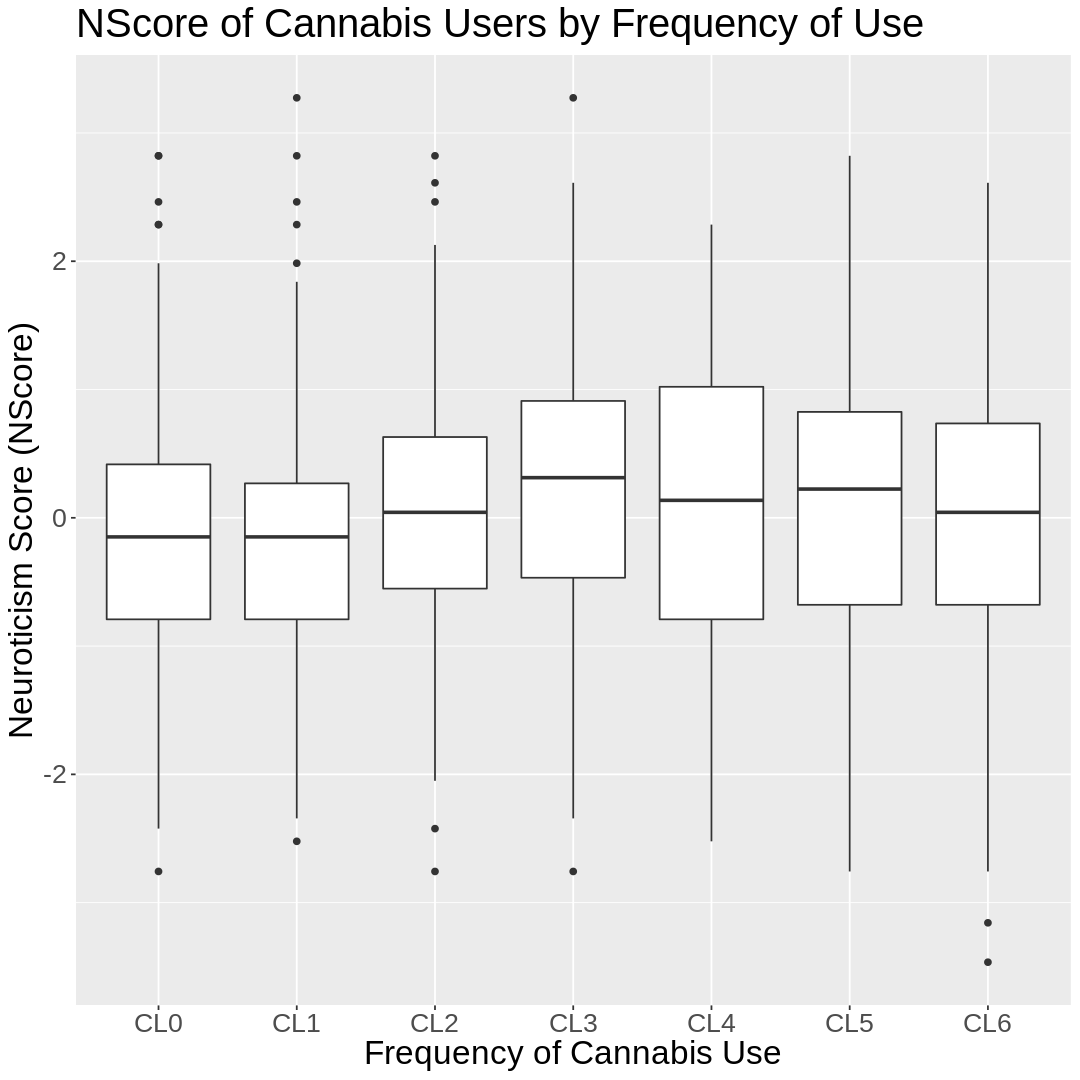

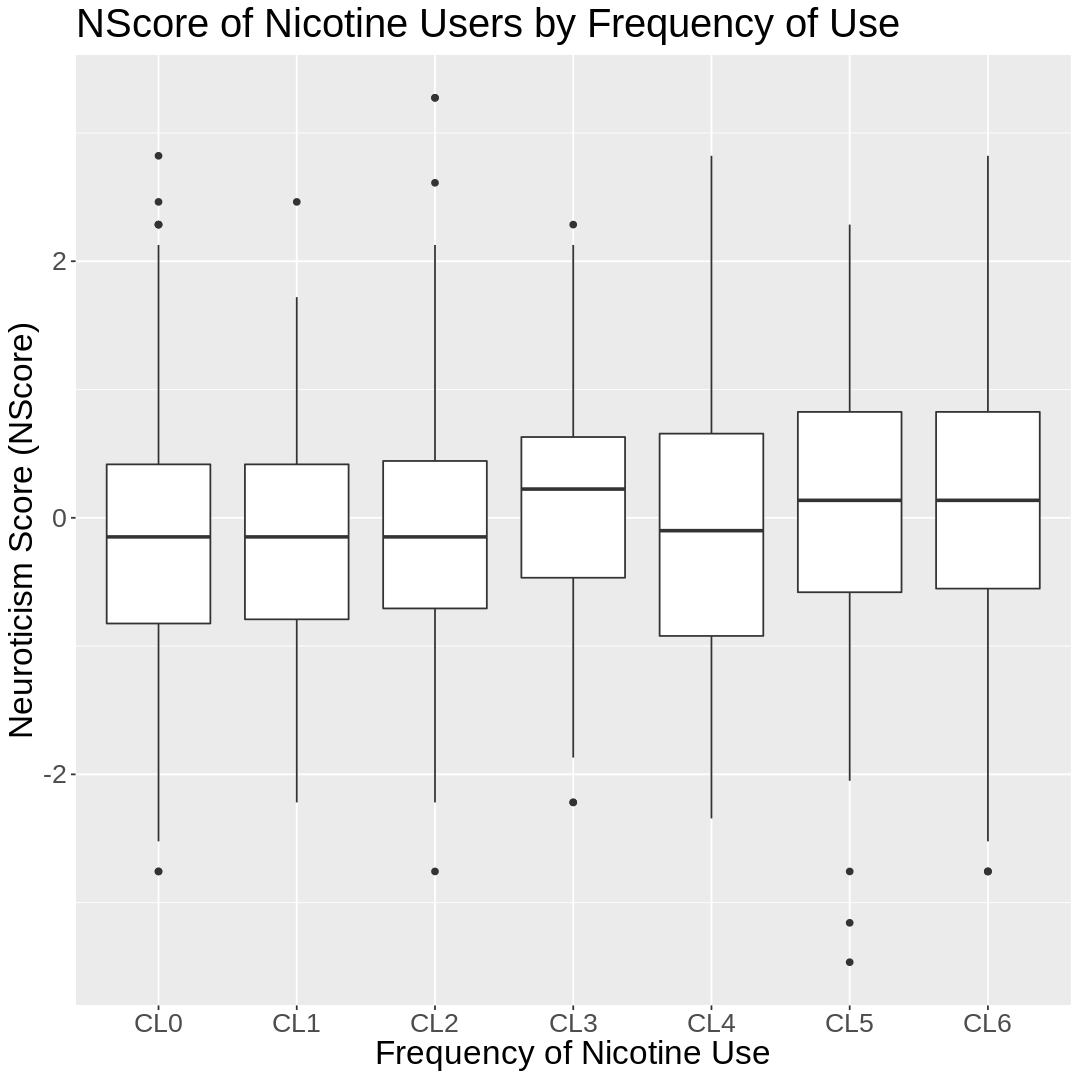

In [4]:
options(repr.plot.width = 9, repr.plot.height = 9)
C_plot <- 
    NCan %>% 
    ggplot(aes(x = Cannabis, y = NScore)) +
    geom_boxplot() +
    labs(title = "NScore of Cannabis Users by Frequency of Use", x = "Frequency of Cannabis Use", y = "Neuroticism Score (NScore)") +
    theme(text = element_text(size = 20))
C_plot


N_plot <- 
    NNic %>% 
    ggplot(aes(x = Nicotine, y = NScore)) +
    geom_boxplot() +
    labs(title = "NScore of Nicotine Users by Frequency of Use", x = "Frequency of Nicotine Use", y = "Neuroticism Score (NScore)") +
    theme(text = element_text(size = 20))
N_plot


As can be seen from the above plots, users of nicotine and cannabis have a higher mean NScore than non-users in general.
The means and standard deviations for different levels (CL0 to CL6) of cannabis and nicotine users were calculated from the entire dataset and are shown below. 


In [5]:
NCan0 <- NCan %>%
    filter(Cannabis == "CL0") %>%
    summarise(mean = mean(NScore))
NCan1 <- NCan %>%
    filter(Cannabis == "CL1") %>%
    summarise(mean = mean(NScore))
NCan2 <- NCan %>%
    filter(Cannabis == "CL2") %>%
    summarise(mean = mean(NScore))
NCan3 <- NCan %>%
    filter(Cannabis == "CL3") %>%
    summarise(mean = mean(NScore))
NCan4 <- NCan %>%
    filter(Cannabis == "CL4") %>%
    summarise(mean = mean(NScore))
NCan5 <- NCan %>%
    filter(Cannabis == "CL5") %>%
    summarise(mean = mean(NScore))
NCan6 <- NCan %>%
    filter(Cannabis == "CL6") %>%
    summarise(mean = mean(NScore))
NNic0 <- NNic %>%
    filter(Nicotine == "CL0") %>%
    summarise(mean = mean(NScore))
NNic1 <- NNic %>%
    filter(Nicotine == "CL1") %>%
    summarise(mean = mean(NScore))
NNic2 <- NNic %>%
    filter(Nicotine == "CL2") %>%
    summarise(mean = mean(NScore))
NNic3 <- NNic %>%
    filter(Nicotine == "CL3") %>%
    summarise(mean = mean(NScore))
NNic4 <- NNic %>%
    filter(Nicotine == "CL4") %>%
    summarise(mean = mean(NScore))
NNic5 <- NNic %>%
    filter(Nicotine == "CL5") %>%
    summarise(mean = mean(NScore))
NNic6 <- NNic %>%
    filter(Nicotine == "CL6") %>%
    summarise(mean = mean(NScore))

NCan0SD <- NCan %>%
    filter(Cannabis == "CL0") %>%
    summarise(sd = sd(NScore))
NCan1SD <- NCan %>%
    filter(Cannabis == "CL1") %>%
    summarise(sd = sd(NScore))
NCan2SD <- NCan %>%
    filter(Cannabis == "CL2") %>%
    summarise(sd = sd(NScore))
NCan3SD <- NCan %>%
    filter(Cannabis == "CL3") %>%
    summarise(sd = sd(NScore))
NCan4SD <- NCan %>%
    filter(Cannabis == "CL4") %>%
    summarise(sd = sd(NScore))
NCan5SD <- NCan %>%
    filter(Cannabis == "CL5") %>%
    summarise(sd = sd(NScore))
NCan6SD <- NCan %>%
    filter(Cannabis == "CL6") %>%
    summarise(sd = sd(NScore))

NNic0SD <- NNic %>%
    filter(Nicotine == "CL0") %>%
    summarise(sd = sd(NScore))
NNic1SD <- NNic %>%
    filter(Nicotine == "CL1") %>%
    summarise(sd = sd(NScore))
NNic2SD <- NNic %>%
    filter(Nicotine == "CL2") %>%
    summarise(sd = sd(NScore))
NNic3SD <- NNic %>%
    filter(Nicotine == "CL3") %>%
    summarise(sd = sd(NScore))
NNic4SD <- NNic %>%
    filter(Nicotine == "CL4") %>%
    summarise(sd = sd(NScore))
NNic5SD <- NNic %>%
    filter(Nicotine == "CL5") %>%
    summarise(sd = sd(NScore))
NNic6SD <- NNic %>%
    filter(Nicotine == "CL6") %>%
    summarise(sd = sd(NScore))


estimates <- tibble(
  NScore = c("Mean Cannabis NScore", "Mean Nicotine NScore", "SD Cannabis NScore", "SD Nicotine NScore"),
  CL0 = c(NCan0, NNic0, NCan0SD, NNic0SD),
  CL1 = c(NCan1, NNic1, NCan1SD, NNic1SD),
  CL2 = c(NCan2, NNic2, NCan2SD, NNic2SD),
  CL3 = c(NCan3, NNic3, NCan3SD, NNic3SD),
  CL4 = c(NCan4, NNic4, NCan4SD, NNic4SD),
  CL5 = c(NCan5, NNic5, NCan5SD, NNic5SD),
  CL6 = c(NCan6, NNic6, NCan6SD, NNic6SD),
)
estimates

"Table 3: Categories and Associated NScores"

NScore,CL0,CL1,CL2,CL3,CL4,CL5,CL6
<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
Mean Cannabis NScore,-0.1854634,-0.2260046,0.07992045,0.2463208,0.1114626,0.05761919,0.05177181
Mean Nicotine NScore,-0.1676289,-0.2108781,-0.02646873,0.1351638,-0.03571435,0.03527096,0.1495843
SD Cannabis NScore,0.9362514,0.9341124,0.9415867,0.9837093,1.088898,1.042031,1.030212
SD Nicotine NScore,1.007839,0.9107402,0.9676951,0.8912152,1.052762,1.016117,1.017001


[1] "Table 3: Categories and Associated NScores"

<h2>Methods</h2>

- In our analysis, we are plotting graphs and examining trends in the data for each drug. The trends observed seem to be close to what we would expect.

- As the frequency of usage increases for both drugs, the mean neuroticism score increases. To compare the means, we will create a 95% confidence interval for the mean estimate of Nscores for nicotine and cannabis users for each frequency. For our comparisons, our null hypothesis will be the mean Nscores for nicotine = mean Nscores for cannabis. We will then use a two tailed t-test to check if there exists a significant difference in our results.

- Consequently, our analysis would help us better understand the effects of drugs such as nicotine and cannabis and recommend an adequate daily intake that would not cause severe neuroticism - a prevalent consequence of over-consumption of such drugs. In the future, we would like to make more comparisons of the mean neuroticism scores between other drugs that were not included in the study.

Here, we are cleaning the dataset so that we only have respondents who had never used both of these drugs.

In [6]:
NCanCL0 <- NCan %>%
filter(Cannabis == "CL0") %>%
rename(Drug = Cannabis)
NCanCL0[NCanCL0 == "CL0"] <- "Cannabis"
NNicCL0 <- NNic %>%
filter(Nicotine == "CL0") %>%
rename(Drug = Nicotine)
NNicCL0[NNicCL0 == "CL0"] <- "Nicotine"
CL0_med <- rbind(NCanCL0, NNicCL0)

Now we are calculating the test statistic, which is the difference of means for people who have not used either drug ever.

In [7]:
set.seed(9)
# Get observed TestStat
# Ex.
odm_CL0 <- 
    CL0_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL0 <- 
    CL0_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL0 <-
    visualize(ndm_CL0, bins = 20) + 
    shade_p_value(obs_stat = odm_CL0, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))

In [8]:
# Get PVAL
# Ex.
PVal_CL0 <-
    ndm_CL0 %>% 
    get_p_value(obs_stat =  odm_CL0, direction = "both")
PVal_CL0

p_value
<dbl>
0.824


As you can see, the p-value is 0.824 which is greater than 0.05, so we fail to reject the null hypothesis that the two observed means are different. So, we can't say that there is any difference in neurotocism scores at this level of drug use.

[1] "Figure 2: Bootstrap Distribution with Shaded Confidence Intervals for Category CL0"

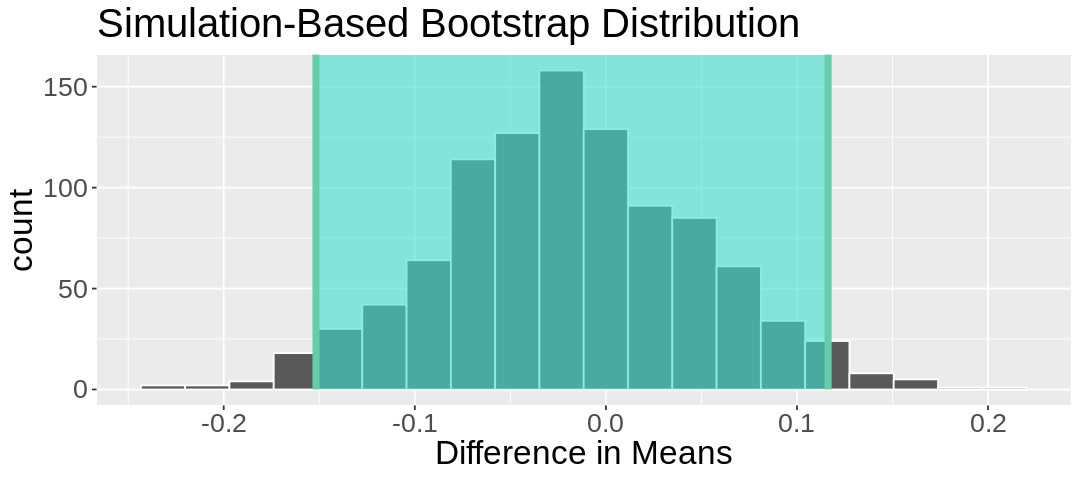

In [9]:
set.seed(9)
options(repr.plot.width = 9, repr.plot.height = 4)
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL0 <- 
    CL0_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL0 <- 
    dim_dist_CL0 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
# Plot the CI
# Ex.
dim_ci_plot_CL0 <-
    visualize(dim_dist_CL0, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL0) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
dim_ci_plot_CL0
"Figure 2: Bootstrap Distribution with Shaded Confidence Intervals for Category CL0"

We repeat the same process for respondents who had consumed these drugs over a decade ago (CL1). We create a dataset with only observations with CL1 and then fine test statistic and p-value.

In [10]:
set.seed(9)
NCanCL1 <- NCan %>%
filter(Cannabis == "CL1") %>%
rename(Drug = Cannabis)
NCanCL1[NCanCL1 == "CL1"] <- "Cannabis"
NNicCL1 <- NNic %>%
filter(Nicotine == "CL1") %>%
rename(Drug = Nicotine)
NNicCL1[NNicCL1 == "CL1"] <- "Nicotine"
CL1_med <- rbind(NCanCL1, NNicCL1)
# Get observed TestStat
# Ex.
odm_CL1 <- 
    CL1_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL1 <- 
    CL1_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL1 <-
    visualize(ndm_CL1, bins = 20) + 
    shade_p_value(obs_stat = odm_CL1, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL1 <-
    ndm_CL1 %>% 
    get_p_value(obs_stat =  odm_CL1, direction = "both")
PVal_CL1
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL1 <- 
    CL1_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL1 <- 
    dim_dist_CL1 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL1
# Plot the CI
# Ex.
dim_ci_plot_CL1 <-
    visualize(dim_dist_CL1, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL1) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.884


lower_ci,upper_ci
<dbl>,<dbl>
-0.1997419,0.1740732


You can see that the p-value is 0.884 which is greater than 0.05 again. So, we fail to reject the null hypothesis at 95% confidence interval. Which means that the means are not significantly different for Cannabis and Nicotine when the users have consumed them over a decade ago(CL1).

We repeat the same for CL2, which is all respondents who used cannabis and nicotine in the last decade. We create a database with only such respondents and then calculate test statistic (difference in means) and calculate the corresponding p-value and confidence interval.

In [11]:
set.seed(9)
NCanCL2 <- NCan %>%
filter(Cannabis == "CL2") %>%
rename(Drug = Cannabis)
NCanCL2[NCanCL2 == "CL2"] <- "Cannabis"
NNicCL2 <- NNic %>%
filter(Nicotine == "CL2") %>%
rename(Drug = Nicotine)
NNicCL2[NNicCL2 == "CL2"] <- "Nicotine"
CL2_med <- rbind(NCanCL2, NNicCL2)
# Get observed TestStat
# Ex.
odm_CL2 <- 
    CL2_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL2 <- 
    CL2_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL2 <-
    visualize(ndm_CL2, bins = 20) + 
    shade_p_value(obs_stat = odm_CL2, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL2 <-
    ndm_CL2 %>% 
    get_p_value(obs_stat =  odm_CL2, direction = "both")
PVal_CL2
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL2 <- 
    CL2_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL2 <- 
    dim_dist_CL2 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL2
# Plot the CI
# Ex.
dim_ci_plot_CL2 <-
    visualize(dim_dist_CL2, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL2) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.248


lower_ci,upper_ci
<dbl>,<dbl>
-0.06767018,0.2769041


We can see that the p-value is 0.248. This p-value greater than 0.05, so we fail to reject the null hypothesis, which means that there is no significant difference in mean neuroticism scores for cannabis and nicotine.

We repeat the same for CL3, which is all respondents who used cannabis and nicotine in the last year. We create a database with only such respondents and then calculate test statistic (difference in means) and calculate the corresponding p-value and confidence interval.

In [12]:
set.seed(9)
NCanCL3 <- NCan %>%
filter(Cannabis == "CL3") %>%
rename(Drug = Cannabis)
NCanCL3[NCanCL3 == "CL3"] <- "Cannabis"
NNicCL3 <- NNic %>%
filter(Nicotine == "CL3") %>%
rename(Drug = Nicotine)
NNicCL3[NNicCL3 == "CL3"] <- "Nicotine"
CL3_med <- rbind(NCanCL3, NNicCL3)
# Get observed TestStat
# Ex.
odm_CL3 <- 
    CL3_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL3 <- 
    CL3_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL3 <-
    visualize(ndm_CL3, bins = 20) + 
    shade_p_value(obs_stat = odm_CL3, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL3 <-
    ndm_CL3 %>% 
    get_p_value(obs_stat =  odm_CL3, direction = "both")
PVal_CL3
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL3 <- 
    CL3_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL3 <- 
    dim_dist_CL3 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL3
# Plot the CI
# Ex.
dim_ci_plot_CL3 <-
    visualize(dim_dist_CL3, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL3) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.222


lower_ci,upper_ci
<dbl>,<dbl>
-0.06562885,0.294567


As the p-value is greater than 0.05, we fail to reject the null hypothesis at 5% significance level, so there is no difference between mean neuroticism scores for cannabis and nicotine at CL3 category as well.

We repeat the same for CL4, which is all respondents who used cannabis and nicotine in the last month. We create a database with only such respondents and then calculate test statistic (difference in means) and calculate the corresponding p-value and confidence interval.

In [13]:
set.seed(9)
NCanCL4 <- NCan %>%
filter(Cannabis == "CL4") %>%
rename(Drug = Cannabis)
NCanCL4[NCanCL4 == "CL4"] <- "Cannabis"
NNicCL4 <- NNic %>%
filter(Nicotine == "CL4") %>%
rename(Drug = Nicotine)
NNicCL4[NNicCL4 == "CL4"] <- "Nicotine"
CL4_med <- rbind(NCanCL4, NNicCL4)
# Get observed TestStat
# Ex.
odm_CL4 <- 
    CL4_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL4 <- 
    CL4_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL4 <-
    visualize(ndm_CL4, bins = 20) + 
    shade_p_value(obs_stat = odm_CL4, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL4 <-
    ndm_CL4 %>% 
    get_p_value(obs_stat =  odm_CL4, direction = "both")
PVal_CL4
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL4 <- 
    CL4_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL4 <- 
    dim_dist_CL4 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL4
# Plot the CI
# Ex.
dim_ci_plot_CL4 <-
    visualize(dim_dist_CL4, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL4) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.3


lower_ci,upper_ci
<dbl>,<dbl>
-0.1124853,0.4058453


We can see that the p-value is 0.3. This p-value greater than 0.05, so we fail to reject the null hypothesis at 5% significance level, which means that there is no significant difference in mean neuroticism scores for cannabis and nicotine at category CL4 either.

We repeat the same for CL5, which is all respondents who used cannabis and nicotine in the last week. We create a database with only such respondents and then calculate test statistic (difference in means) and calculate the corresponding p-value and confidence interval.

In [14]:
set.seed(9)
NCanCL5 <- NCan %>%
filter(Cannabis == "CL5") %>%
rename(Drug = Cannabis)
NCanCL5[NCanCL5 == "CL5"] <- "Cannabis"
NNicCL5 <- NNic %>%
filter(Nicotine == "CL5") %>%
rename(Drug = Nicotine)
NNicCL5[NNicCL5 == "CL5"] <- "Nicotine"
CL5_med <- rbind(NCanCL5, NNicCL5)
# Get observed TestStat
# Ex.
odm_CL5 <- 
    CL5_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL5 <- 
    CL5_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL5 <-
    visualize(ndm_CL5, bins = 20) + 
    shade_p_value(obs_stat = odm_CL5, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL5 <-
    ndm_CL5 %>% 
    get_p_value(obs_stat =  odm_CL5, direction = "both")
PVal_CL5
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL5 <- 
    CL5_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL5 <- 
    dim_dist_CL5 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL5
# Plot the CI
# Ex.
dim_ci_plot_CL5 <-
    visualize(dim_dist_CL5, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL5) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.838


lower_ci,upper_ci
<dbl>,<dbl>
-0.1898681,0.2488147


We can see that the p-value is 0.838. This p-value is greater than 0.05, so we fail to reject the null hypothesis at 5% significance level, which means that there is no significant difference in mean neuroticism scores for cannabis and nicotine at category CL5 either.

We repeat the same for CL6, which is all respondents who used cannabis and nicotine in the last day. We create a database with only such respondents and then calculate test statistic (difference in means) and calculate the corresponding p-value and confidence interval.

In [15]:
set.seed(9)
NCanCL6 <- NCan %>%
filter(Cannabis == "CL6") %>%
rename(Drug = Cannabis)
NCanCL6[NCanCL6 == "CL6"] <- "Cannabis"
NNicCL6 <- NNic %>%
filter(Nicotine == "CL6") %>%
rename(Drug = Nicotine)
NNicCL6[NNicCL6 == "CL6"] <- "Nicotine"
CL6_med <- rbind(NCanCL6, NNicCL6)
# Get observed TestStat
# Ex.
odm_CL6 <- 
    CL6_med  %>% 
    specify(formula = NScore ~ Drug) %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))

# Bootstrap to make NullM with Mean
# Ex.
ndm_CL6 <- 
    CL6_med %>% 
    specify(formula = NScore ~ Drug) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Plot the difference
# Ex.
dim_plot_CL6 <-
    visualize(ndm_CL6, bins = 20) + 
    shade_p_value(obs_stat = odm_CL6, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
PVal_CL6 <-
    ndm_CL6 %>% 
    get_p_value(obs_stat =  odm_CL6, direction = "both")
PVal_CL6
# 95% CI for 2SIDE
# BootDist the diff in means
# Ex.
dim_dist_CL6 <- 
    CL6_med %>%
    specify(formula = NScore ~ Drug) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Cannabis", "Nicotine"))
# Get CI
# Ex.
dim_ci_CL6 <- 
    dim_dist_CL6 %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
dim_ci_CL6
# Plot the CI
# Ex.
dim_ci_plot_CL6 <-
    visualize(dim_dist_CL6, bins = 20) + 
    shade_confidence_interval(endpoints = dim_ci_CL6) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")

p_value
<dbl>
0.13


lower_ci,upper_ci
<dbl>,<dbl>
-0.2273998,0.02481226


We can see that the p-value is 0.13. This p-value is larger than 0.05, so we do not have enough evidence to reject the null hypothesis at 5% significance level. This means that there is no significant difference in mean neurotocism scores for cannabis and nicotine at CL6 level either.

Next, we will compute a two-sample t-test to compare the means between Cannabis and Nicotine for each category from CL0 to CL6.

We will be testing:

   $H_{0}: \mu_{c} - \mu_{r} = 0$ 

vs $H_{A}: \mu_{c} - \mu_{r} \neq 0$

The null hypothesis $H_{0}$ states that both Cannabis and Nicotine have the same mean neuroticism scores and the alternative hypothesis $H_{A}$ states that there is a difference in the mean neuroticism scores.
We'll be using a low significance level of $\alpha = 0.05$ so that there is a lower chance that the p-value will be less than $\alpha$.

We then generate a test statistic for the category CL0.

In [16]:
obs_two_sample_t0 <- CL0_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))
obs_two_sample_t0

stat
<dbl>
-0.2659895


Next, assuming the null hypothesis $H_{0}$ is true, we generate a null distribution for the category CL0 and its p-value.

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Figure 3: Null Distribution for Category CL0"

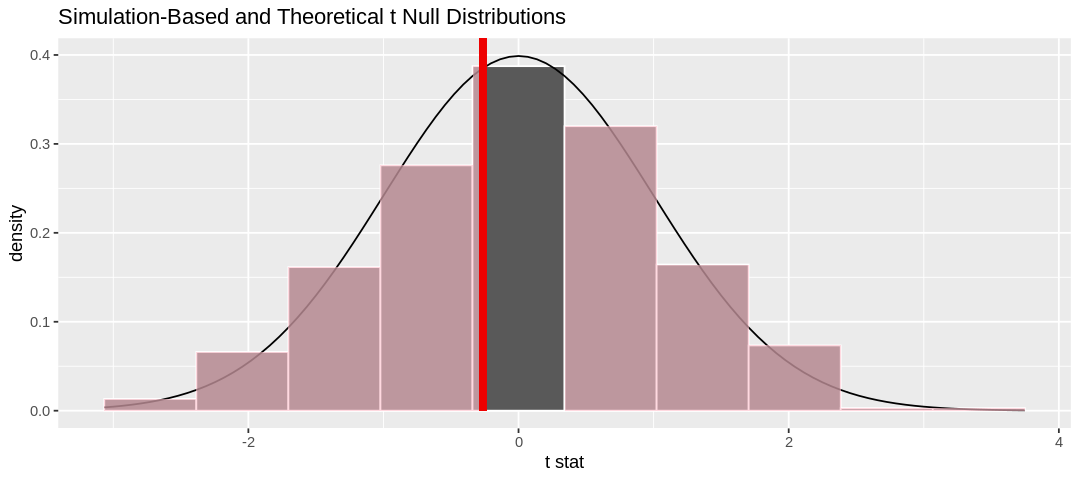

In [17]:
options(repr.plot.width = 9, repr.plot.height = 4)
null_distribution_t0 <- CL0_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot0 <- visualize(null_distribution_t0, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t0, direction = "both")
null_plot0
"Figure 3: Null Distribution for Category CL0"

Figure 3 above shows the t-distribution with its shaded p-value. Using the function tidy from the broom package and the t.test(), we obtain detailed information about the test.

In [18]:
"Data of the t-test for CL0"
tidy(t.test(NScore ~ Drug, data = CL0_med, conf.level = 0.95))

[1] "Data of the t-test for CL0"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.01783451,-0.1854634,-0.1676289,-0.2659895,0.7903127,837.7959,-0.1494396,0.1137706,Welch Two Sample t-test,two.sided


From our observations, we can see that the p-value is 0.756. This p-value is larger than 0.05, so we do not reject the null hypothesis at the 5% significance level, which means that there is no significant difference in mean neuroticism scores for Cannabis and Nicotine for the category CL0.

[1] "Figure 4: Comparing the Null Distributions for the Two Test Statistics of Category CL0"

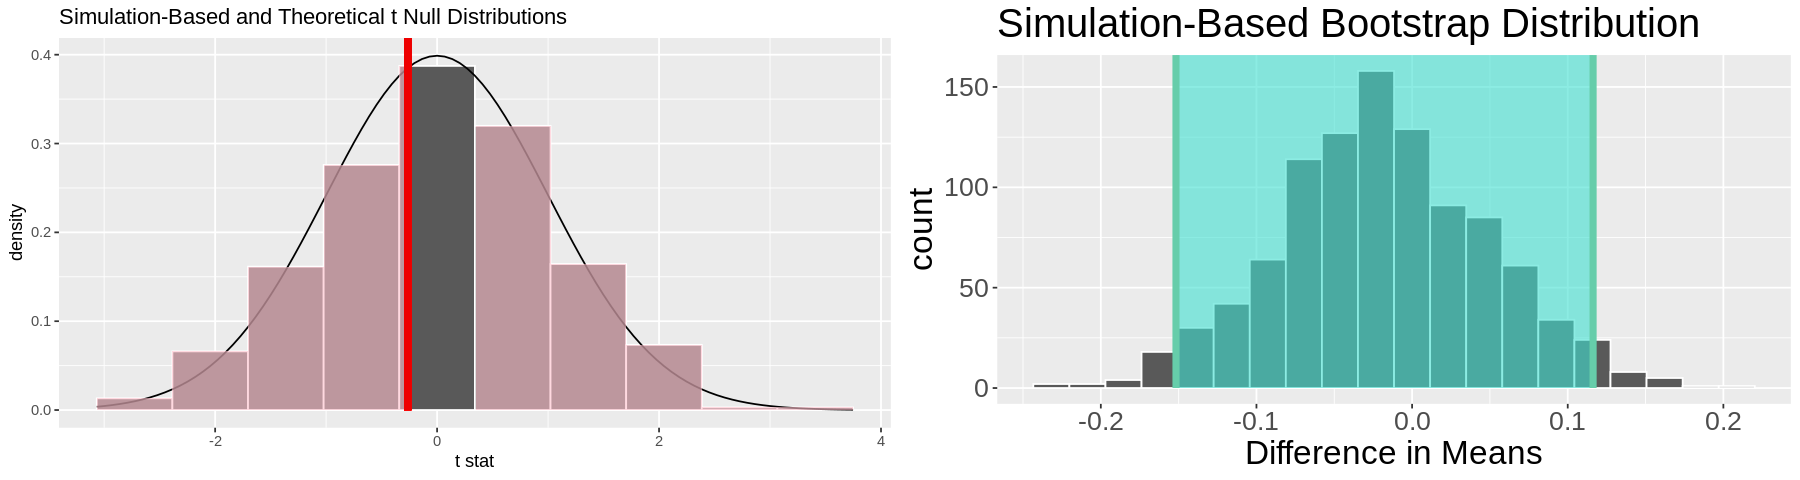

In [19]:
options(repr.plot.width = 15, repr.plot.height = 4)
plot_grid(null_plot0, dim_ci_plot_CL0, nrow = 1, ncol = 2)
"Figure 4: Comparing the Null Distributions for the Two Test Statistics of Category CL0"

By looking at the null distributions of the two statistics, we observe that although the shape of the t-distributions are approximately similar, the scales of the x-axis for the t-distribution is wider. Thus, it means that the values for the two-sample t-statistic are spread out over a larger range.
Next, we will also repeat the analysis for the other categories. 

In [20]:
#CL1
obs_two_sample_t1 <- CL1_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t1 <- CL1_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot1 <- visualize(null_distribution_t1, bins = 10, method = 'both') +
            shade_p_value(obs_stat = obs_two_sample_t1, direction = "both")

"Data of the t-test for CL1"
tidy(t.test(NScore ~ Drug, data = CL1_med, conf.level = 0.95))

#CL2
obs_two_sample_t2 <- CL2_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t2 <- CL2_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot2 <- visualize(null_distribution_t2, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t2, direction = "both")

"Data of the t-test for CL2"
tidy(t.test(NScore ~ Drug, data = CL2_med, conf.level = 0.95))

#CL3
obs_two_sample_t3 <- CL3_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t3 <- CL3_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot3 <- visualize(null_distribution_t3, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t3, direction = "both")

"Data of the t-test for CL3"
tidy(t.test(NScore ~ Drug, data = CL3_med, conf.level = 0.95))

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL1"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.01512645,-0.2260046,-0.2108781,-0.1639446,0.8698582,397.2,-0.1965165,0.1662636,Welch Two Sample t-test,two.sided


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL2"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1063892,0.07992045,-0.02646873,1.195204,0.2326649,430.8236,-0.06856542,0.2813438,Welch Two Sample t-test,two.sided


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL3"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.111157,0.2463208,0.1351638,1.179621,0.2388634,393.5693,-0.07410227,0.2964163,Welch Two Sample t-test,two.sided


In [21]:
#CL4
obs_two_sample_t4 <- CL4_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t4 <- CL4_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot4 <- visualize(null_distribution_t4, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t4, direction = "both")

"Data of the t-test for CL4"
tidy(t.test(NScore ~ Drug, data = CL4_med, conf.level = 0.95))

#CL5
obs_two_sample_t5 <- CL5_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t5 <- CL5_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))
    
null_plot5 <- visualize(null_distribution_t5, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t5, direction = "both")

"Data of the t-test for CL5"
tidy(t.test(NScore ~ Drug, data = CL5_med, conf.level = 0.95))

#CL6
obs_two_sample_t6 <- CL6_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_distribution_t6 <- CL6_med %>% 
  specify(formula = NScore ~ Drug) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "t", order = c("Cannabis", "Nicotine"))

null_plot6 <- visualize(null_distribution_t6, bins = 10, method = 'both') +
    shade_p_value(obs_stat = obs_two_sample_t6, direction = "both")

"Data of the t-test for CL6"
tidy(t.test(NScore ~ Drug, data = CL6_med, conf.level = 0.95))

Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL4"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1471769,0.1114626,-0.03571435,1.075362,0.2833207,233.8714,-0.1224643,0.4168181,Welch Two Sample t-test,two.sided


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL5"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02234823,0.05761919,0.03527096,0.200324,0.8413493,333.4972,-0.1971026,0.2417991,Welch Two Sample t-test,two.sided


Warning message:
“Check to make sure the conditions have been met for the theoretical method. {infer} currently does not check these for you.”


[1] "Data of the t-test for CL6"

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.0978125,0.05177181,0.1495843,-1.548903,0.1217252,988.108,-0.2217351,0.0261101,Welch Two Sample t-test,two.sided


[1] "Figure 5: Comparing the Null Distributions for the Two Test Statistics of Category CL1"

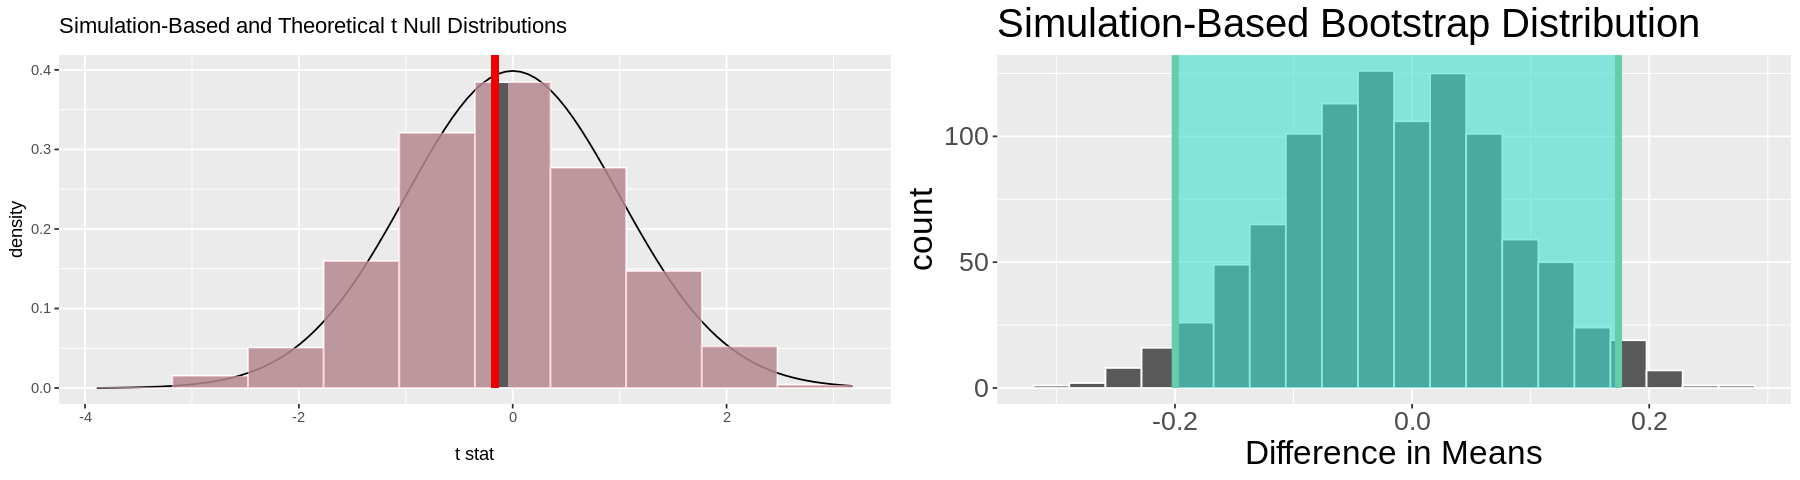

[1] "Figure 6: Comparing the Null Distributions for the Two Test Statistics of Category CL2"

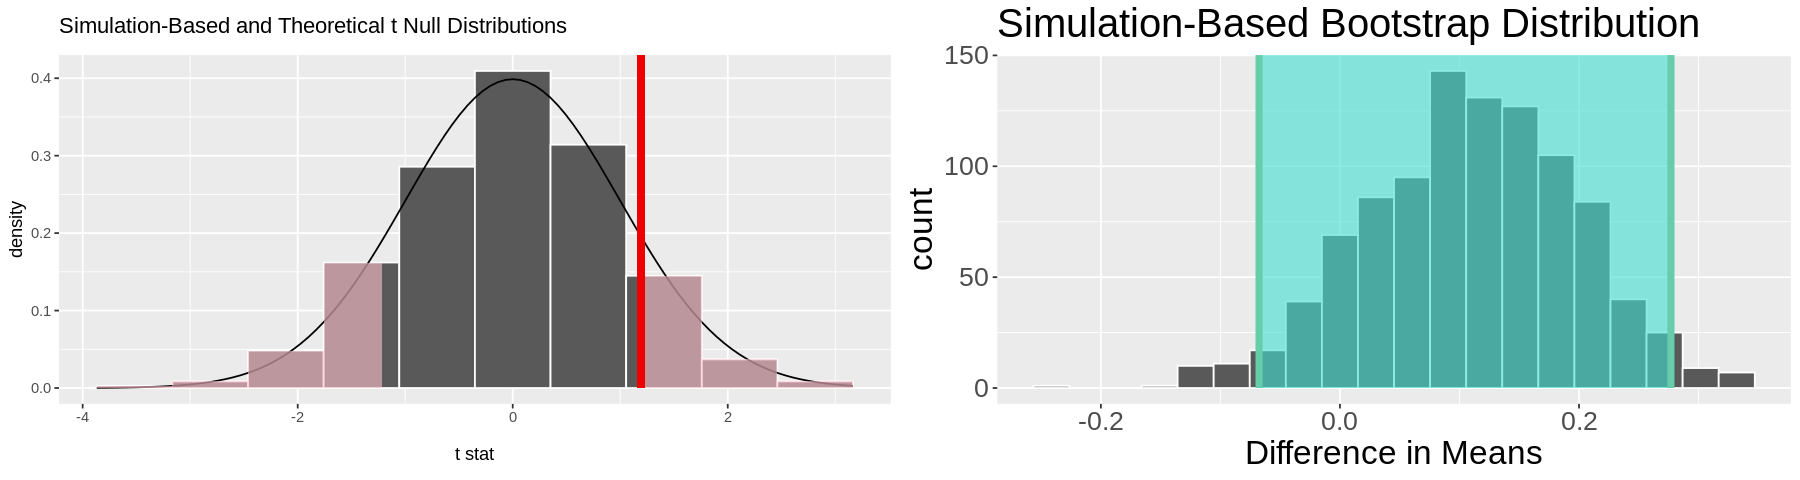

[1] "Figure 7: Comparing the Null Distributions for the Two Test Statistics of Category CL3"

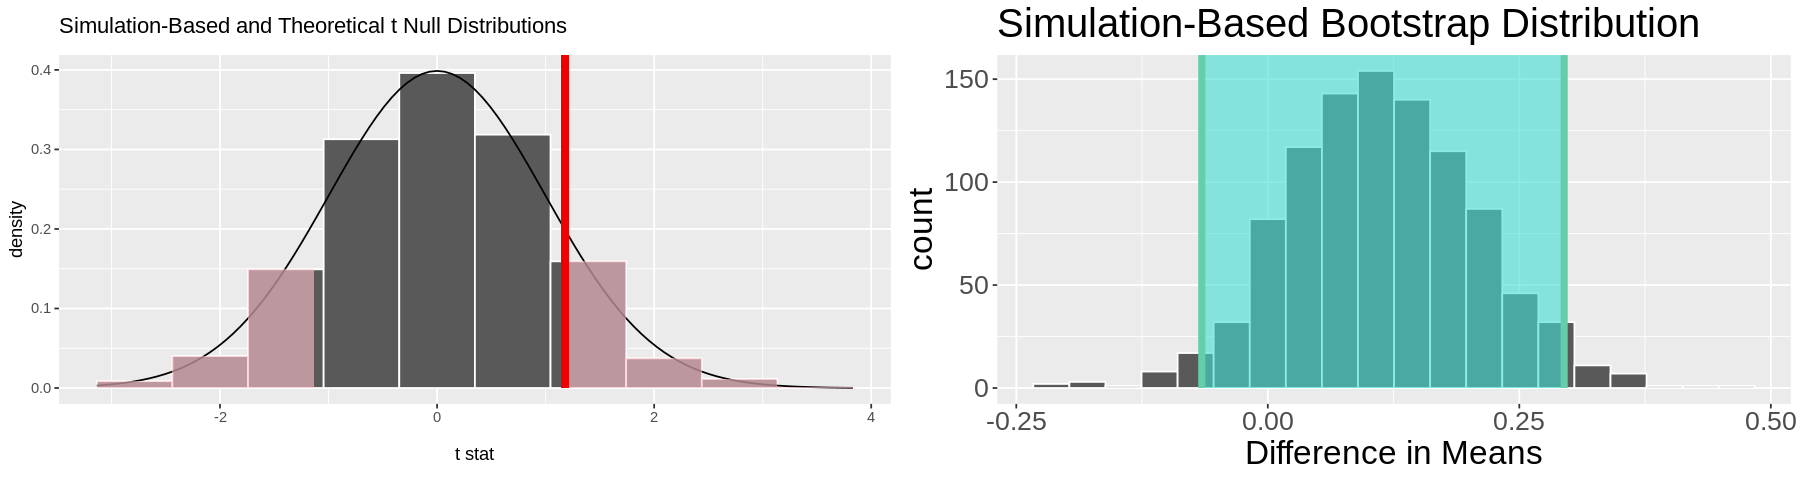

[1] "Figure 8: Comparing the Null Distributions for the Two Test Statistics of Category CL4"

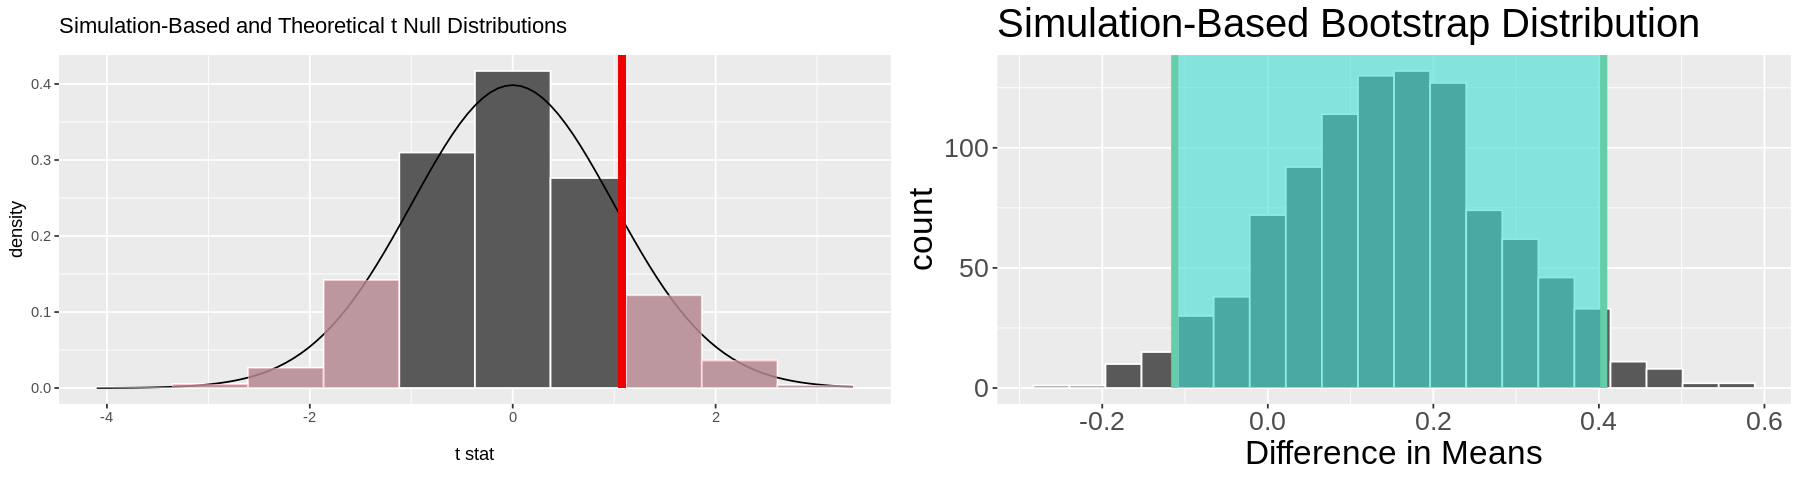

[1] "Figure 9: Comparing the Null Distributions for the Two Test Statistics of Category CL5"

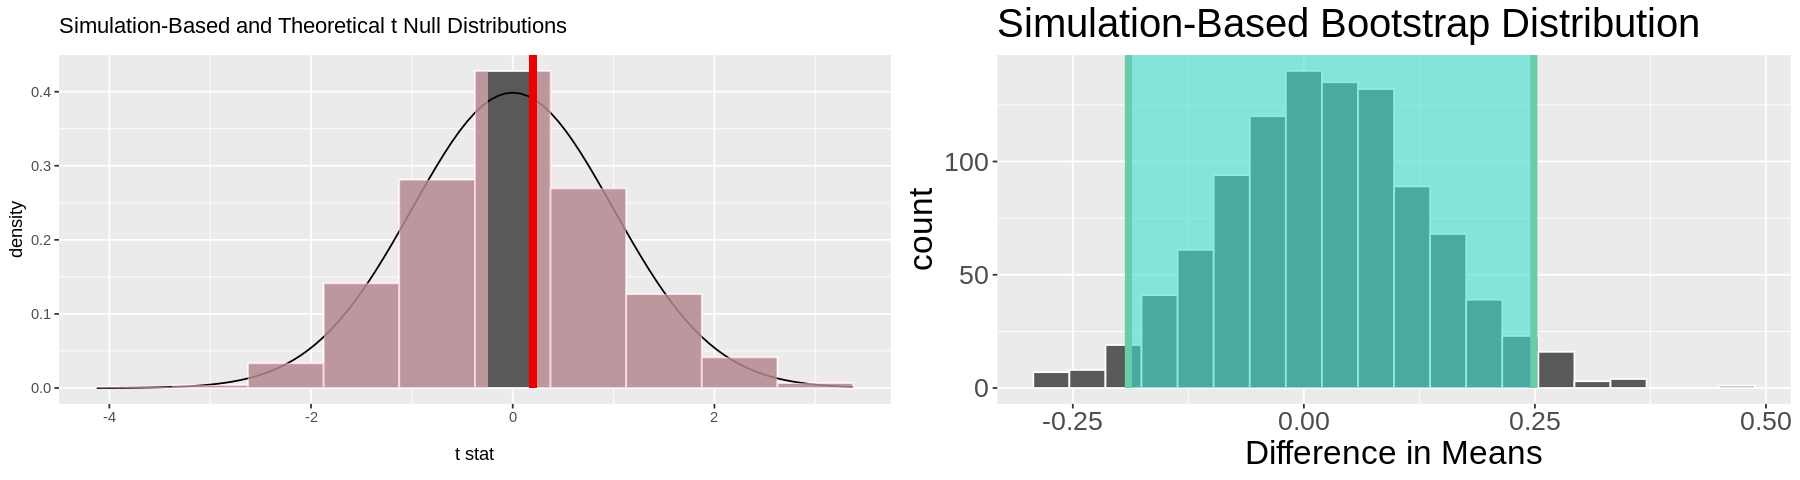

[1] "Figure 10: Comparing the Null Distributions for the Two Test Statistics of Category CL6"

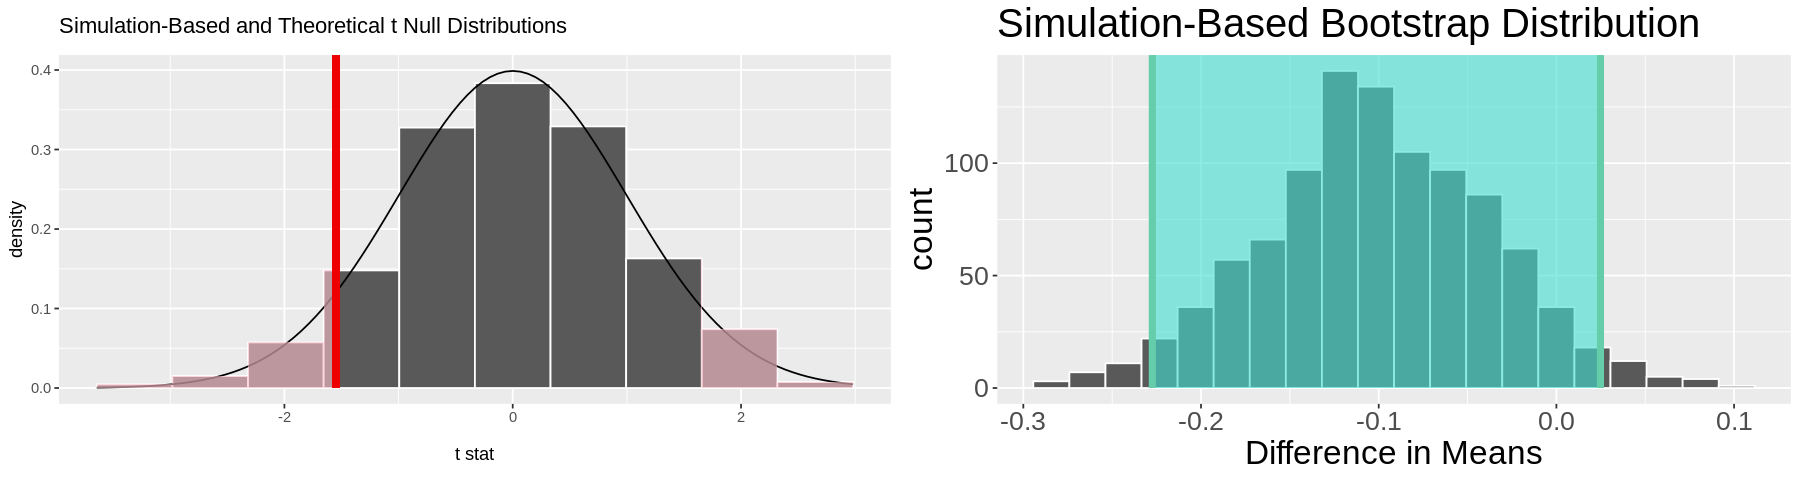

In [22]:
options(repr.plot.width = 15, repr.plot.height = 4)

plot_grid(null_plot1, dim_ci_plot_CL1, align = "h", nrow = 1, ncol = 2)
"Figure 5: Comparing the Null Distributions for the Two Test Statistics of Category CL1"
plot_grid(null_plot2, dim_ci_plot_CL2, align = "h", nrow = 1, ncol = 2)
"Figure 6: Comparing the Null Distributions for the Two Test Statistics of Category CL2"
plot_grid(null_plot3, dim_ci_plot_CL3, align = "h", nrow = 1, ncol = 2)
"Figure 7: Comparing the Null Distributions for the Two Test Statistics of Category CL3"
plot_grid(null_plot4, dim_ci_plot_CL4, align = "h", nrow = 1, ncol = 2)
"Figure 8: Comparing the Null Distributions for the Two Test Statistics of Category CL4"
plot_grid(null_plot5, dim_ci_plot_CL5, align = "h", nrow = 1, ncol = 2)
"Figure 9: Comparing the Null Distributions for the Two Test Statistics of Category CL5"
plot_grid(null_plot6, dim_ci_plot_CL6, align = "h", nrow = 1, ncol = 2)
"Figure 10: Comparing the Null Distributions for the Two Test Statistics of Category CL6"

<h2>Discussion</h2>

For all the levels of drug usage (CL0,CL1,CL2,CL3,CL4,CL5,CL6), we failed to reject the null hypothesis that there was a difference in the mean neurotocism score for cannabis and nicotine. The p-value for daily drug usage (CL6) was pretty small, but not small enough for us to reject the null hypothesis that states that there is a difference in the mean neurotocism score for cannabis and nicotine. 

We expected that there would be some difference between the mean neurotocism score for cannabis and nicotine, as nicotine is more addictive and we expected more respondents in the daily usage category (CL6). One thing that remained consistent with our preliminary hypothesis is increased frequency in usage seemed to positively correlate with statistical significance in rejecting the null hypothesis.

We created null distributions and added test statistic values and shaded p-regions and confirmed that there is enough evidence to not reject the null hypothesis using visualizations. 

Future research should aim to look at the significance of drug usage and testing N-Scores for other drugs. To further extend research, one could check for differences in mean N-Scores for different levels of drug usage for a single drug. The resulting null hypothesis would be that the mean N-Score of Classification 1 is equal to the mean N-Score Classification 2, and the corresponding alternate hypothesis would be that the mean N-Score of Classification 1 is less than the mean N-Score Classification 2.

<h3>References</h3>

Wawryk-Gawda, E., Marta Lis-Sochocka, P.-C.-W., Budzy ́nska, B., & Jodłowska-Jędrych, B. (2019). The impact of traditional cigarettes and e-cigarettes on the brain. Neuroscience of Nicotine, 25–32.

Sauer-Zavala, S., & Barlow, D. H. (2021). Neuroticism : A new framework for emotional disorders and their treatment. Guilford Publications.

United Nations (2018). Analysis of Drug Markets: Opiates, cocaine, cannabis, synthetic drugs. World Drug Report.

Statistics Canada, (2021, December 20). Alcohol and Drug Use in Canada, 2019. https://www150.statcan.gc.ca/n1/daily-quotidien/211220/dq211220c-eng.htm.

World Health Organization (WHO), (2021, July 26). Tobacco. https://www.who.int/news-room/fact-sheets/detail/tobacco.